In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import collections

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.preprocessing import FunctionTransformer

In [5]:
train = pd.read_csv('../mapt/MachineLearningSolutions_Code/Chapter01/credit-risk-modelling-master/data/cs-training.csv')
test = pd.read_csv('../mapt/MachineLearningSolutions_Code/Chapter01/credit-risk-modelling-master/data/cs-test.csv')

In [6]:
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(train.columns)):
    cleancolumn.append(train.columns[i].replace('-', '').lower())
train.columns = cleancolumn

In [7]:
train.head()

,unnamed: 0,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
train.rename(columns={'unnamed: 0': 'id'},inplace=True)

In [7]:
train.shape

(150000, 12)

In [8]:
train.isnull().sum()

id                                          0
seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

In [9]:
print('Median:\n',train[train.columns].median())
print('\n')
print('Mean:\n',train[train.columns].mean())

Median:
 id                                      75000.500000
seriousdlqin2yrs                            0.000000
revolvingutilizationofunsecuredlines        0.154181
age                                        52.000000
numberoftime3059dayspastduenotworse         0.000000
debtratio                                   0.366508
monthlyincome                            5400.000000
numberofopencreditlinesandloans             8.000000
numberoftimes90dayslate                     0.000000
numberrealestateloansorlines                1.000000
numberoftime6089dayspastduenotworse         0.000000
numberofdependents                          0.000000
dtype: float64


Mean:
 id                                      75000.500000
seriousdlqin2yrs                            0.066840
revolvingutilizationofunsecuredlines        6.048438
age                                        52.295207
numberoftime3059dayspastduenotworse         0.421033
debtratio                                 353.005076
monthlyincome

In [10]:
train.seriousdlqin2yrs.value_counts() / train.shape[0] *100

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

In [8]:
train.fillna(train.median(),inplace=True)

In [12]:
train.isnull().sum()

id                                      0
seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [13]:
train.corr()

,id,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
id,1.000000,0.002801,0.002372,0.004403,-0.000571,-0.002906,0.002400,0.004586,-0.001104,-0.000666,-0.000777,0.000148
seriousdlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.017151,-0.029669,0.117175,-0.007038,0.102261,0.046869
revolvingutilizationofunsecuredlines,0.002372,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,0.004403,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.000571,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,-0.002906,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.002400,-0.017151,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,0.004586,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001104,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,-0.000666,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399


In [14]:
#sns.pairplot(train)
cols = []
def ContVars(dataFrame):
    for col in dataFrame:
        if (len(train[col].unique()) > 10):
            print("{} : {} : {} \n".format(col, train[col].nunique(), train[col].unique()))
            cols.append(col)

contCols=ContVars(train)
display(contCols)

id : 150000 : [     1      2      3 ... 149998 149999 150000] 

revolvingutilizationofunsecuredlines : 125728 : [0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295] 

age : 86 : [ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109] 

numberoftime3059dayspastduenotworse : 16 : [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11] 

debtratio : 114194 : [0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808] 

monthlyincome : 13594 : [ 9120.  2600.  3042. ... 15648.   521.  7647.] 

numberofopencreditlinesandloans : 58 : [13  4  2  5  7  3  8  9  6 10 14 22 17  1 15 31 12 21 11 19 18 26 20 23
  0 16 27 29 28 24 25 32 46 33 30 34 37 38 36 35 54 43 45 49 57 48 40 58
 5

None

#### Handling outliners

In [9]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))

#percentile_based_outlier(train.RevolvingUtilizationOfUnsecuredLines)

In [10]:
# Median Absolute deviation based outliner detection
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

#mad_based_outlier(points=train.age)

In [11]:
# Standard Deviation based outliner detection
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

#std_div(data=training_data.age)

In [12]:
# Majority based outliner detection
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in temp:
        if i.count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

#outlierVote(data=train.age)

In [13]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict

outlierRatio(train.age)

{'percentile_based_outlier': [6543, '4.36%'],
 'mad_based_outlier': [0, '0.00%'],
 'std_div': [102197, '68.13%'],
 'outlierVote': [3515, '2.34%']}

In [14]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

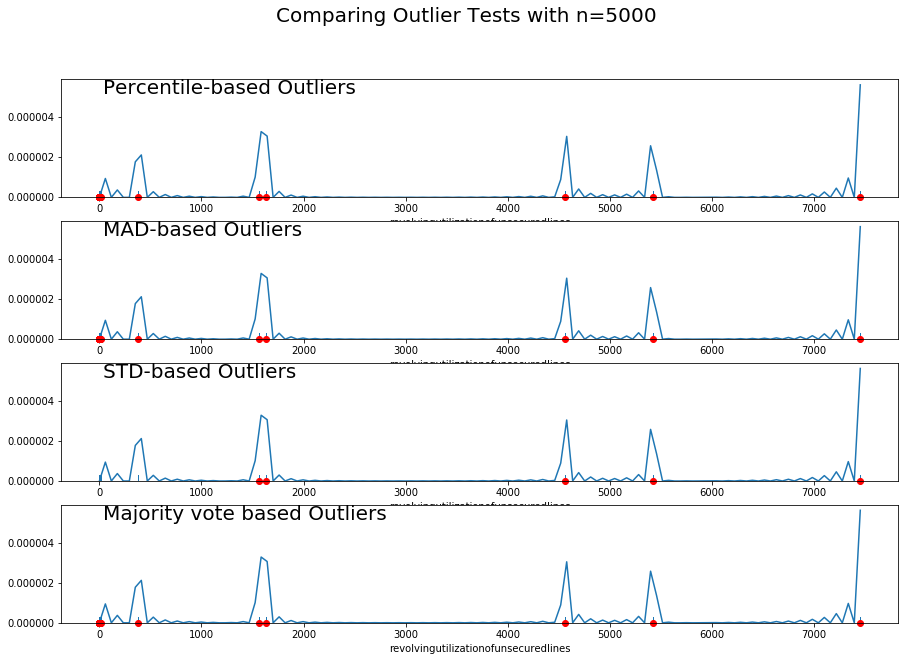

In [21]:
plotOutlier(train.revolvingutilizationofunsecuredlines.sample(5000))

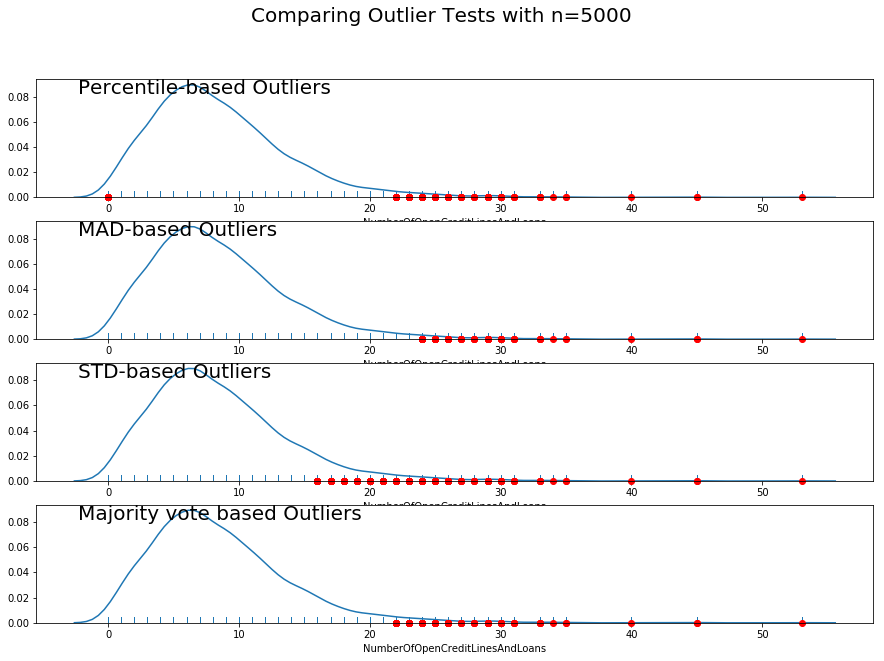

In [74]:
plotOutlier(train.NumberOfOpenCreditLinesAndLoans.sample(5000))

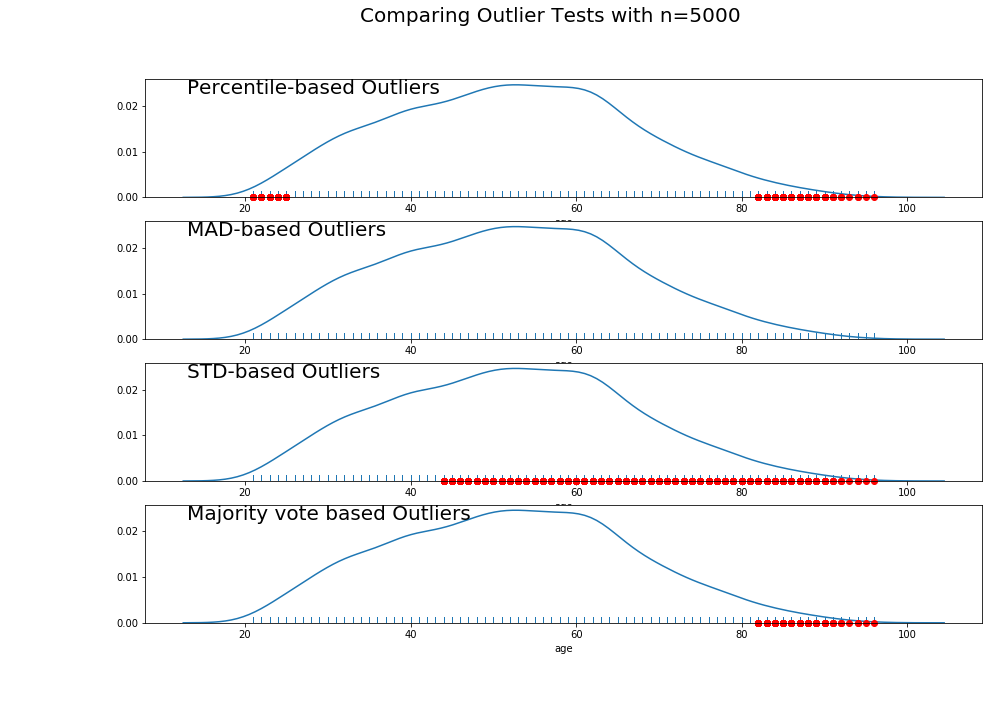

In [75]:
plotOutlier(train.age.sample(5000))

In [22]:
collections.Counter(train.age.sort_values())

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

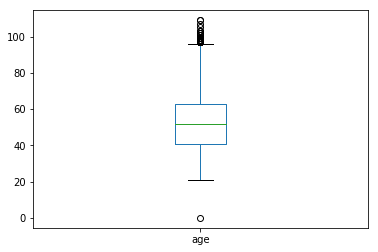

In [23]:
train.age.plot.box()

In [15]:
revNew = []
for val in train.revolvingutilizationofunsecuredlines.values:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)

train['revolvingutilizationofunsecuredlines'] = revNew

In [16]:
ageNew = []
for val in train.age.values:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
train.age = ageNew

In [26]:
collections.Counter(train.numberoftime3059dayspastduenotworse.sort_values(ascending=True))

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [17]:
new = []
med = train.numberoftime3059dayspastduenotworse.median()
for val in train.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        new.append(med)
    else:
        new.append(val)

train.numberoftime3059dayspastduenotworse = new

In [28]:
outlierRatio(train.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

In [18]:
minUpperBound = min([val for (val, out) in zip(train.debtratio, mad_based_outlier(train.debtratio)) \
                     if out == True])

In [19]:
newDebtRatio = []
for val in train.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

train.debtratio = newDebtRatio 

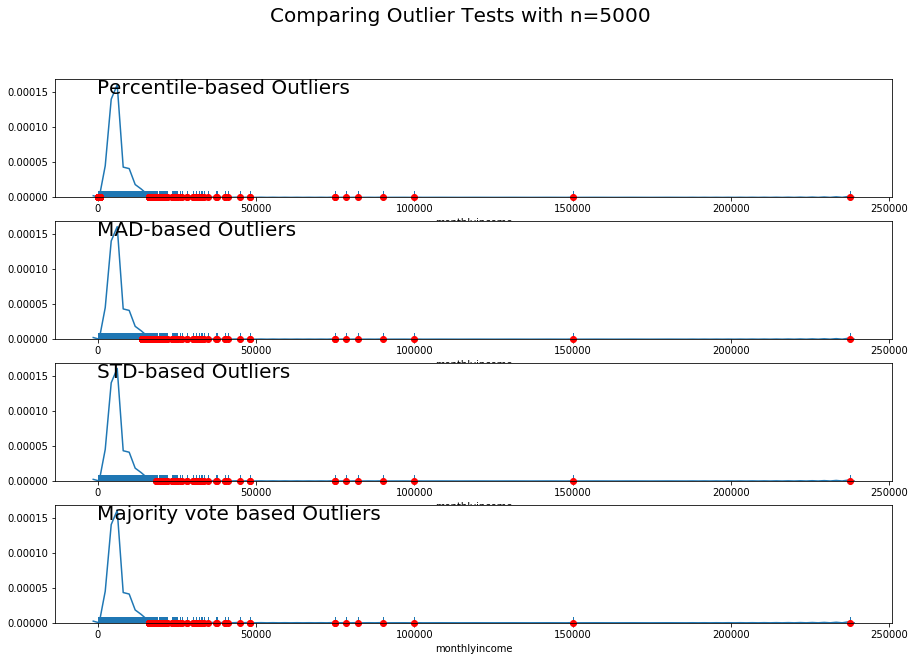

In [32]:
plotOutlier(train.monthlyincome.sample(5000))

In [33]:
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

In [82]:
#plotOutlierFree(train.monthlyincome.sample(5000))

In [39]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [41]:
#incomeNew = replaceOutlier(train.monthlyincome, replace='minUpper')
#train['monthlyincome'] = incomeNew

In [44]:
collections.Counter(train.numberoftimes90dayslate.sort_values(ascending=True))

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

In [20]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [21]:
new = removeSpecificAndPutMedian(train.numberoftimes90dayslate)
train.numberoftimes90dayslate = new

In [47]:
collections.Counter(train.numberrealestateloansorlines.sort_values(ascending=True))

Counter({0: 56188,
         1: 52338,
         2: 31522,
         3: 6300,
         4: 2170,
         5: 689,
         6: 320,
         7: 171,
         8: 93,
         9: 78,
         10: 37,
         11: 23,
         12: 18,
         13: 15,
         14: 7,
         15: 7,
         16: 4,
         17: 4,
         18: 2,
         19: 2,
         20: 2,
         21: 1,
         23: 2,
         25: 3,
         26: 1,
         29: 1,
         32: 1,
         54: 1})

In [22]:
realNew = []
for val in train.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
        
train.numberrealestateloansorlines = realNew

In [49]:
collections.Counter(train.numberoftime6089dayspastduenotworse.sort_values(ascending=True))

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

In [23]:
new = removeSpecificAndPutMedian(train.numberoftime6089dayspastduenotworse)
train.numberoftime6089dayspastduenotworse = new

In [51]:
collections.Counter(train.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [24]:
depNew = []
for var in train.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)
        
train.numberofdependents = depNew

#### Feature Importance

In [56]:
X = train.drop('seriousdlqin2yrs', axis=1)
y = train.seriousdlqin2yrs
features_label = train.columns[1:]
forest = RandomForestClassifier (n_estimators = 1000, random_state=101, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) seriousdlqin2yrs               0.159528
 2) revolvingutilizationofunsecuredlines 0.157146
 3) age                            0.122674
 4) numberoftime3059dayspastduenotworse 0.121370
 5) debtratio                      0.112688
 6) monthlyincome                  0.085024
 7) numberofopencreditlinesandloans 0.081652
 8) numberoftimes90dayslate        0.047529
 9) numberrealestateloansorlines   0.043988
10) numberoftime6089dayspastduenotworse 0.037133
11) numberofdependents             0.031268


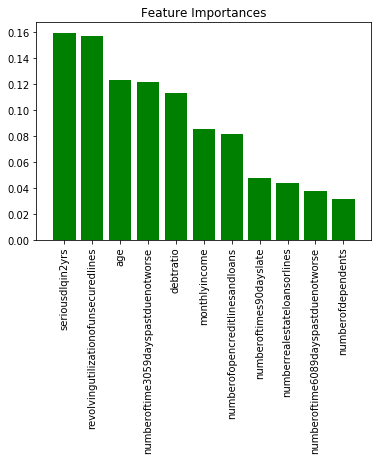

In [57]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [25]:
X = train.drop('seriousdlqin2yrs', axis=1)
y = train.seriousdlqin2yrs

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [27]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [28]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
knMod.score(X_test,y_test)

0.93112

In [30]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [31]:
test_labels

array([0. , 0. , 0.2, ..., 0. , 0.2, 0.2])

In [32]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5135207405472729

In [33]:
pred = knMod.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[34908   105]
 [ 2478     9]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     35013
          1       0.08      0.00      0.01      2487

avg / total       0.88      0.93      0.90     37500



In [34]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [35]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

In [36]:
glmMod.score(X_test, y_test)

0.9364

In [37]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8437773431526053

In [38]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [39]:
adaMod.score(X_test, y_test)

0.93584

In [40]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8530985062001958

In [41]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [43]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [44]:
gbMod.score(X_test, y_test)

0.9357866666666667

In [45]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8584629620767774

In [46]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [47]:
rfMod.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
rfMod.score(X_test, y_test)

0.9336

In [49]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7792439573050304

#### Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [51]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.7s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.0s finished


{'KNeighborsClassifier': [0.5108709117787225, 0.009792671442536257],
 'LogisticRegression': [0.8487459391609132, 0.003527261141990989],
 'AdaBoostClassifier': [0.8580928326013637, 0.002565871360781911],
 'GradientBoostingClassifier': [0.8183762763239045, 0.07144381553505559],
 'RandomForestClassifier': [0.6684843502159028, 0.22030862979785168]}

### Hyper parameter optimization

#### Adaboost

In [52]:
adaHyperParams = {'n_estimators': [10,50,100,200,400]}

In [53]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.5s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.4s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.5s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   7.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   7.0s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.4min finished


In [54]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.8585065929761727)

#### Gradient boosting

In [55]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [56]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=exponential, max_depth=1, n_estimators=339 .................
[CV] .. loss=exponential, max_depth=1, n_estimators=339, total=  10.3s
[CV] loss=exponential, max_depth=1, n_estimators=339 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s


[CV] .. loss=exponential, max_depth=1, n_estimators=339, total=  12.7s
[CV] loss=exponential, max_depth=1, n_estimators=339 .................
[CV] .. loss=exponential, max_depth=1, n_estimators=339, total=   9.1s
[CV] loss=deviance, max_depth=1, n_estimators=257 ....................
[CV] ..... loss=deviance, max_depth=1, n_estimators=257, total=   7.6s
[CV] loss=deviance, max_depth=1, n_estimators=257 ....................
[CV] ..... loss=deviance, max_depth=1, n_estimators=257, total=   8.4s
[CV] loss=deviance, max_depth=1, n_estimators=257 ....................
[CV] ..... loss=deviance, max_depth=1, n_estimators=257, total=   7.7s
[CV] loss=exponential, max_depth=8, n_estimators=98 ..................
[CV] ... loss=exponential, max_depth=8, n_estimators=98, total=  39.8s
[CV] loss=exponential, max_depth=8, n_estimators=98 ..................
[CV] ... loss=exponential, max_depth=8, n_estimators=98, total=  37.5s
[CV] loss=exponential, max_depth=8, n_estimators=98 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 16.5min finished


In [57]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'deviance', 'max_depth': 2, 'n_estimators': 482}, 0.8635833616225059)

In [58]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [59]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [60]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [61]:
cvDictbestpara

{'GradientBoostingClassifier': [0.8459512171723134, 0.019883052010907523],
 'AdaBoostClassifier': [0.8589143402950254, 0.0028603273809615663]}

In [62]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [63]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8574104435975419

In [64]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [65]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.854233371025118

### Feature Transformation

In [67]:
transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [68]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [69]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [70]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.9min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


In [71]:
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8459141015745578, 0.019929256001348872],
 'AdaBoostClassifier': [0.8589143402950254, 0.0028603273809615663]}

In [72]:
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

In [73]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [74]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8574160937477517

In [75]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.854233371025118

#### Voting based ensemble model

In [77]:
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [78]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]
votingMod.score(X_test_transform, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9368266666666667

In [79]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8575102169817308

In [80]:
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

In [81]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.857449983164964